In [2]:
# imports and defining initial conditions/evolution operators

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Time and step variables
T = 10        # Total time
dt = 0.001    # Time step size
N = int(T/dt) # total number of time steps
# Initialize time array
t_list = np.arange(0,T+dt,dt)

n = 1       # number of runs

# Coefficients and Operators
delta = 1
B = 0.5
gamma = 2

s_p = np.array([[0,1], [0,0]])
s_m = np.array([[0,0], [1,0]])
s_z = np.array([[1,0], [0,-1]])
I = np.array([[1,0],[0,1]])


# Hamiltonian matrix from Berislav Buˇca, Cameron Booker, and Dieter Jaksch
Hsum1 = np.kron(np.kron(s_p,s_m),I) + np.kron(np.kron(s_m,s_p),I) + delta * np.kron(np.kron(s_z,s_z),I) + B * np.kron(np.kron(I,s_z),I)
Hsum2 = np.kron(np.kron(s_m,I),s_p) + np.kron(np.kron(s_p,I),s_m) + delta * np.kron(np.kron(s_z,I),s_z) + B * np.kron(np.kron(s_z,I),I)
Hsum3 = np.kron(np.kron(I,s_p),s_m) + np.kron(np.kron(I,s_m),s_p) + delta * np.kron(np.kron(I,s_z),s_z) + B * np.kron(np.kron(I,I),s_z)

Hamiltonian = Hsum1 + Hsum2 + Hsum3
#Hamiltonian = np.kron(np.array([[1,0,0,0], 
#                        [0,1,0,0], 
#                        [0,0,0,1], 
#                        [0,0,1,0]]),I)

print("Hamiltonian matrix H: \n", Hamiltonian)

#V_Operator = np.kron(np.kron(s_m,I), I)

# V operator from Berislav Buˇca, Cameron Booker, and Dieter Jaksch
V_Operator = np.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[-1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]])   # from paper
#V = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
#V = np.array([[0,0], [1,0]])   # jump operator V = sigma minus
#V = np.kron(np.kron(V,I),I)

print("Jump Operator: \n", V_Operator)


# Initial state psi

#rho_init = np.array([[1,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]]) # density matrix for ground state |111>
#rho_0 = np.array([[1,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]) # density matrix for excited state |00>
#rho_0 = np.array([[1,0], [0,0]]) # density matrix for excited state |0>

rng = np.random.default_rng(4444)
rfloat = rng.random()
print(rfloat)

rho_init = np.empty((8,8))

for i in range(len(rho_init)):
    for j in range(len(rho_init)):
        rho_init[i][j] = rng.random()

rho_init = rho_init/np.trace(rho_init) # off-diagonal elements != 0: Mixed state

"""Makes all elements except diagonal 0: Pure state

for i in range(len(rho_init)):
    for j in range(len(rho_init)):
        if i != j:
            rho_init[i][j] = 0"""

    

print("ρ(0) = \n", rho_init)

print("trace: ", np.trace(rho_init))

Hamiltonian matrix H: 
 [[ 4.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  1.   0.   1.   0.   0.   0. ]
 [ 0.   1.  -0.5  0.   1.   0.   0.   0. ]
 [ 0.   0.   0.  -1.5  0.   1.   1.   0. ]
 [ 0.   1.   1.   0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   1.   0.  -1.5  1.   0. ]
 [ 0.   0.   0.   1.   0.   1.  -1.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   1.5]]
Jump Operator: 
 [[ 0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
0.42616147617419053
ρ(0) = 
 [[0.03428678 0.33651956 0.26829466 0.11410343 0.18720029 0.30542251
  0.26562784 0.33466244]
 [0.26893925 0.23528    0.33022515 0.16319409 0.1404974  0.33467564
  0.18495638 0.17157208]
 [0.04784798 0.11763599 0.19646682 0.32671227 0.03987816 0.01317802
  0.26345926 0.28148649]
 [0.20855394 0.05628597 0.18881688 0.03409103 0.26020142 0.13775483
  0.34570788 0.143533

In [3]:
# Defining and Solving Lindblad

def Lindblad_Eq(H,V,rho_0, t_values):
    
    V_dag = V.conj().T # V dagger for Lindblad equation

    print(V_dag)
    
    rho_0 = rho_0.reshape(len(H)*len(H), 1)

    rho_0 = sp.Matrix(rho_0)
    
    
    # Solved Lindblad equation based on jump operators

    # dimensions of jump operator V
    rows, cols = V.shape

    # Create a square matrix rho with symbols
    rho = sp.zeros(rows, cols)
    for i in range(rows):
        for j in range(cols):
            rho[i, j] = sp.Symbol(f'rho{i}{j}')

    print(rho)

    A = -1j * (H @ rho - rho @ H) + gamma * (V @ rho @ V_dag - 0.5*(V_dag @ V @ rho) - 0.5*(rho @ V_dag @ V))

    print("A: ", A)

    ## Convert A to a 4x4 with rho as a 4x1 column vector

    variables = [sp.Symbol(f'rho{i}{j}') for i in range(rows) for j in range(cols)]

    # initialize M (then append each row)

    M = np.empty((0, len(A)))

    for j in range(len(H)):

        for k in range(len(H)):

            # step 1: create a polynomial eq obj for each elem of A

            poly_expr = sp.Poly(A[j, k], *variables)

            # step 2: Get monoms() and coeffs() for the poly

            vars_present = poly_expr.monoms()

            coeffs = poly_expr.coeffs()

            # initialize the new row for m

            m_row = [0 for _ in range(len(A))]

            # for each coeff, put it in the row based on the vars location

            for i in range(len(coeffs)):
                var_index = np.asarray(vars_present[i])
                each_coeff = np.asarray(coeffs[i])

                m_row += each_coeff * var_index

                print("one coeff * var index: ", each_coeff * var_index)

            print("m_row: ", m_row)

            # append m_row to M matrix

            M = np.vstack((M, m_row))

    M = sp.Matrix(M)

    print("M: ", M)

    P, D = M.diagonalize()

    D_numpy = np.array(D)

    print("Diagonalized Matrix of M: ", D)

    for i in range(len(D_numpy)):

        if (sp.Abs(sp.re(D_numpy[i][i])) <= 1*10**(-10)):
            D_numpy[i][i] = 0 + sp.im(D_numpy[i][i])*sp.I

        if (sp.Abs(sp.im(D_numpy[i][i])) <= 1*10**(-10)):
            D_numpy[i][i] = sp.re(D_numpy[i][i]) + 0*sp.I

        print("EValue: ", D_numpy[i][i])

    P_np = np.array(P)

    for i in range(len(P_np)):

        for j in range(len(P_np)):

            if (sp.Abs(sp.re(P_np[i][j])) <= 1*10**(-10)):
                P_np[i][j] = 0 + sp.im(P_np[i][j])*sp.I

            if (sp.Abs(sp.im(P_np[i][j])) <= 1*10**(-10)):
                P_np[i][j] = sp.re(P_np[i][j]) + 0*sp.I


    P = sp.Matrix(P_np)
    D = sp.Matrix(D_numpy)

    print(P)

    P_inv = P.inv()

    t = sp.Symbol('t')

    DExp = sp.diag(*[sp.exp(D[i, i]*t) for i in range(D.shape[0])]) #.exp(D)

    print("DExp: ", DExp)

    rho_t = P @ DExp @ P_inv

    # function to convert rho_t to an sp.matrix with sp.functions inside
    def convert_elements_to_functions(matrix, variable):
        def to_function(element):
            # Use element's string representation to create a new sympy Function
            return sp.Function(str(element))(variable)

        return matrix.applyfunc(to_function)

    print("rho_t: ", rho_t)

    constants = sp.Matrix(sp.symbols('c1:{}'.format(len(H)*len(H)+1)))

    equation1 = sp.Eq(rho_0, rho_t.evalf(subs={t: 0}) @ constants)

    print("Equation1: ", equation1)

    solution = sp.solve(equation1, constants)

    print("Solution: ", solution)

    evoFunction = (rho_t @ constants).subs(solution).reshape(len(H), len(H))

    rho0 = sp.Matrix(len(H), len(H), sp.symbols(f'p1:{len(H)*len(H) + 1}'))

    equation2 = sp.Eq(rho0,evoFunction)

    print("Equation 2: ", equation2)

    # V = sigma minus, np.array([[0,0], [1,0]])
    # and hamiltonian H = sigma z
    # dp/dt = M --> P(t) = ADA^-1 (constants)
    # Solved equation: P(t) = ADA^-1 (constants)
    # where A = eigenvectors of M
    # and D = e^(lambda*t)... eigenvalues of M

    # solving coupled DE, we use the following evolution

    rho_at_t = np.empty([N+1,len(H),len(H)])


    """for i in range(N+1):

        rho_t[i] = [[np.e**(-t_values[i]), 0],[0,1 - np.e**(-t_values[i])]]

    return rho_t"""

    # Create lambdified functions for each element of the matrix
    rho_functions = [sp.lambdify(t, elem) for elem in evoFunction]

    # Evaluate the lambdified functions for each time value
    rho_values = np.array([[func(t_val) for func in rho_functions] for t_val in t_values])

    return rho_values
    
Lind_Evo = Lindblad_Eq(Hamiltonian, V_Operator, rho_init, t_list)

[[ 0  1 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Matrix([[rho00, rho01, rho02, rho03, rho04, rho05, rho06, rho07], [rho10, rho11, rho12, rho13, rho14, rho15, rho16, rho17], [rho20, rho21, rho22, rho23, rho24, rho25, rho26, rho27], [rho30, rho31, rho32, rho33, rho34, rho35, rho36, rho37], [rho40, rho41, rho42, rho43, rho44, rho45, rho46, rho47], [rho50, rho51, rho52, rho53, rho54, rho55, rho56, rho57], [rho60, rho61, rho62, rho63, rho64, rho65, rho66, rho67], [rho70, rho71, rho72, rho73, rho74, rho75, rho76, rho77]])
A:  Matrix([[-4.0*rho00, -2.0*rho01 - 1.0*I*(5.0*rho01 - 1.0*rho02 - 1.0*rho04), -2.0*rho02 - 1.0*I*(-1.0*rho01 + 5.0*rho02 - 1.0*rho04), -2.0*rho03 - 1.0*I*(6.0*rho03 - 1.0*rho05 - 1.0*rho06), -2.0*rho04 - 1.0*I*(-1.0*rho01 - 1.0*rho02 + 5.0*rho04), -2.0*rho05 - 1.0*I*(-1.0*rho03 + 6.0*rho05 - 1.0*rho06), -2

Diagonalized Matrix of M:  Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -3.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -6.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, -6.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -2.11217158481393e-128 - 4.0*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Matrix([[1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.577350269189626*I, 0.815809757986618*I, -0.0684933070840717*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.577350269189626*I, -0.378907826033368*I, -0.675889953149603*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -0.577350269189626, -0.10694948192295 + 0.465298964516824*I, 0.0450677090769773 + 0.790974667468371*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

DExp:  Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, exp(-3.0*I*t), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, exp(-6.0*I*t), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, exp(-6.0*I*t), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, exp(-4.0*I*t), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

rho_t:  Matrix([[1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.666666666666667*exp(-6.0*I*t) + 0.333333333333333*exp(-3.0*I*t), -0.333333333333333*exp(-6.0*I*t) + 0.333333333333333*exp(-3.0*I*t), 0, -0.333333333333333*exp(-6.0*I*t) + 0.333333333333333*exp(-3.0*I*t), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, -0.333333333333333*exp(-6.0*I*t) + 0.333333333333333*exp(-3.0*I*t), 0.666666666666667*exp(-6.0*I*t) + 0.333333333333333*exp(-3.0*I*t), 0, -0.333333333333333*exp(-6.0*I*t) + 0.333333333333333*exp(-3.0*I*t), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

Equation1:  Eq(Matrix([
[0.0342867817147989],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[ 0.235279996538513],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[ 0.196466823665847],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[0.0340910329123219],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[  0.11387843894697],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[                 0],
[       

Solution:  {c1: 0.0342867817147989, c2: 0.0, c3: 0.0, c5: 0.0, c4: 0.0, c6: 0.0, c7: 0.0, c8: 0.0, c9: -0.382150826246499 + 0.443169925214562*I, c10: 0.0128188493225172 + 0.493971061318934*I, c11: -0.106721480385543 - 0.0374506706761836*I, c13: 0.109580322064635 + 0.076890780329642*I, c16: 0.705660350384053 + 0.755679857090625*I, c17: -0.382150826246498 + 0.443169925214563*I, c18: -0.186426067783732 + 0.625440962145207*I, c19: -0.0167087136040087 + 0.0293680002706633*I, c21: -0.00326291868322257 + 0.114575355764378*I, c24: -0.0481010040702575 + 0.153630334139137*I, c28: 0.0370589822366768 + 0.00566613992486396*I, c30: -0.0146586277615112 + 0.000174574189080626*I, c31: 0.0112620502975723 - 0.00103820609941086*I, c33: -0.382150826246501 + 0.443169925214556*I, c34: 0.109620347910413 - 0.0773044183528611*I, c35: -0.23636041287432 - 0.413120005782718*I, c37: 0.882632337794885 - 0.40739408409473*I, c40: 0.91784315313964 - 2.94071088807127*I, c44: -0.000737621432566776 + 0.0026404966956006*I,

/Users/advaithc/Jupyter Notebooks/Synchronization/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/advaithc/Jupyter Notebooks/Synchronization/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


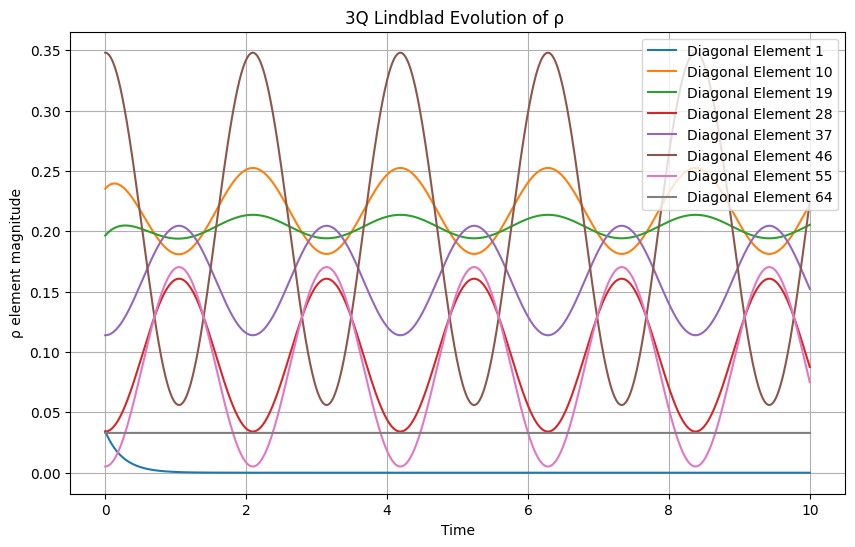

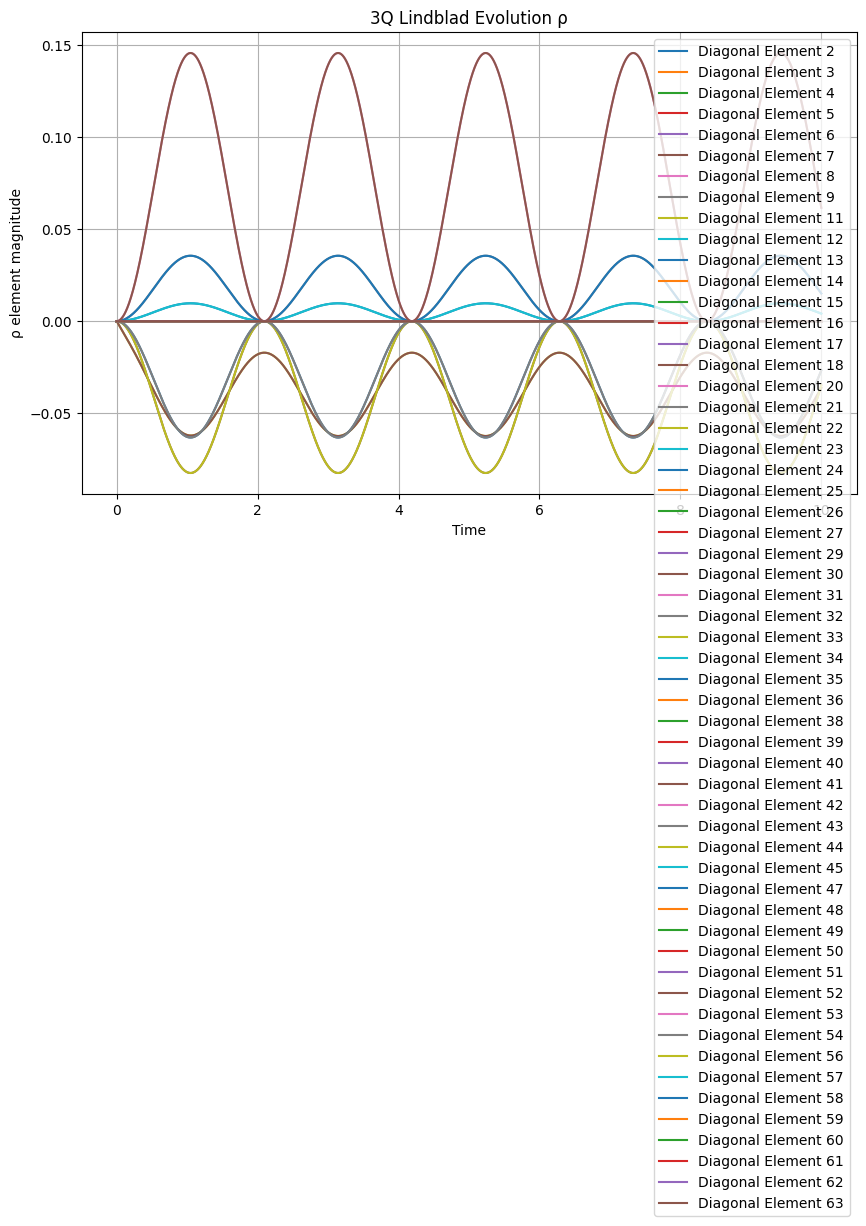

In [3]:
# Plotting Lindblad

def Lindblad_Plot(Lind_Evo,t_values):

    
    # Plot the values of each element of rho against time
    plt.figure(figsize=(10, 6))

    j = 26 # plot thickness

    for i in range(Lind_Evo.shape[1]):
        if i % ((np.sqrt(len(Lind_Evo[0])) + 1)) == 0:  # Check if the index is a diagonal element
            plt.plot(t_values, Lind_Evo[:, i], label=f"Diagonal Element {i + 1}")#, linewidth=j)
            j -= 3
        #plt.plot(t_values, rho_values[:, i], label=f"Element {i + 1}")

    plt.xlabel('Time')
    plt.ylabel('ρ element magnitude')
    plt.title('3Q Lindblad Evolution of ρ ')
    plt.legend()
    plt.grid(True)
    plt.show()

    ## Plot 2

    # Plot the values of each element of rho against time
    plt.figure(figsize=(10, 6))

    for i in range(Lind_Evo.shape[1]):
        if i % ((np.sqrt(len(Lind_Evo[0])) + 1)) != 0:  # Check if the index is a diagonal element
            plt.plot(t_values, Lind_Evo[:, i], label=f"Diagonal Element {i + 1}")
        #plt.plot(t_values, Lind_Evo[:, i], label=f"Element {i + 1}")
        
        

    plt.xlabel('Time')
    plt.ylabel('ρ element magnitude')
    plt.title('3Q Lindblad Evolution ρ')
    plt.legend()
    plt.grid(True)
    plt.show()
    
Lindblad_Plot(Lind_Evo,t_list)




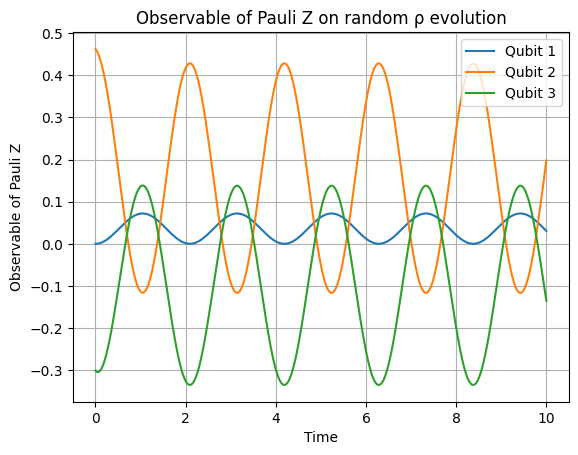

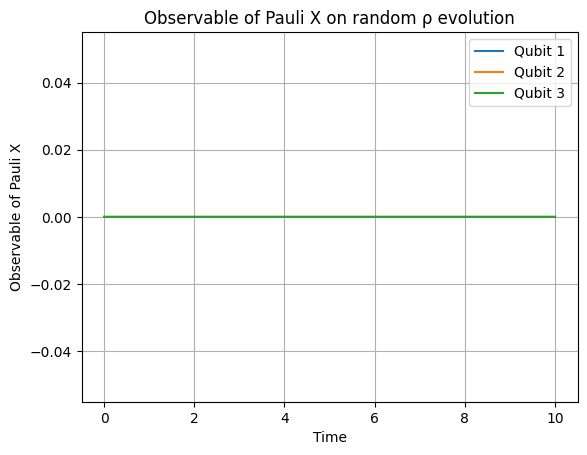

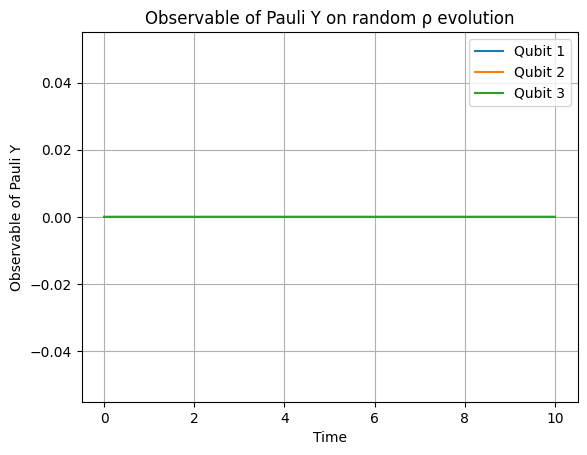

In [4]:
# Observable plotting

# reshape lindblad evolution from (10001,64) to (10001,8,8)
Lind8x8 = Lind_Evo.reshape(len(t_list),8,8)


# Sigma x Pauli operator
sigx = np.array([[0,1], [1,0]])

# Pauli X on qubits 1,2,3
sigx1 = np.kron(np.kron(sigx,I),I)

sigx2 = np.kron(np.kron(I,sigx),I)

sigx3 = np.kron(np.kron(I,I),sigx)



# Sigma y Pauli operator
sigy = np.array([[0,-1j],[1j,0]])

# Pauli Y on qubits 1,2,3
sigy1 = np.kron(np.kron(sigy,I),I)

sigy2 = np.kron(np.kron(I,sigy),I)

sigy3 = np.kron(np.kron(I,I),sigy)


# Sigma Z Pauli operator
sigz = np.array([[1,0],[0,-1]])

# Pauli Z on qubits 1,2,3
sigz1 = np.kron(np.kron(sigz,I),I)

sigz2 = np.kron(np.kron(I,sigz),I)

sigz3 = np.kron(np.kron(I,I),sigz)


# Observable of Pauli X on qubits 1,2,3

obs_x1 = []
obs_x2 = []
obs_x3 = []

for i in range(len(Lind8x8)):
    obs_x1.append(np.trace(Lind8x8[i] @ sigx1)) #observing sigma x when applied to qubit 1
    obs_x2.append(np.trace(Lind8x8[i] @ sigx2))
    obs_x3.append(np.trace(Lind8x8[i]@ sigx3))
    
    
# Observable of Pauli Y on qubits 1,2,3

obs_y1 = []
obs_y2 = []
obs_y3 = []

for i in range(len(Lind8x8)):
    obs_y1.append(np.trace(Lind8x8[i] @ sigy1)) #observing sigma y when applied to qubit 1
    obs_y2.append(np.trace(Lind8x8[i] @ sigy2))
    obs_y3.append(np.trace(Lind8x8[i]@ sigy3))
    
    
# Observable of Pauli Z on qubits 1,2,3
obs_z1 = []
obs_z2 = []
obs_z3 = []

for i in range(len(Lind8x8)):
    obs_z1.append(np.trace(Lind8x8[i] @ sigz1)) #observing sigma z when applied to qubit 1
    obs_z2.append(np.trace(Lind8x8[i] @ sigz2))
    obs_z3.append(np.trace(Lind8x8[i]@ sigz3))

# Plot observable for all 3 qubits  
    
plt.plot(t_list,obs_z1,  label=f"Qubit 1")    
plt.plot(t_list,obs_z2,  label=f"Qubit 2")
plt.plot(t_list,obs_z3,  label=f"Qubit 3")


plt.xlabel('Time')
plt.ylabel('Observable of Pauli Z')
plt.title('Observable of Pauli Z on random ρ evolution')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    
    
    

plt.plot(t_list,obs_x1,  label=f"Qubit 1")    
plt.plot(t_list,obs_x2,  label=f"Qubit 2")
plt.plot(t_list,obs_x3,  label=f"Qubit 3")

plt.xlabel('Time')
plt.ylabel('Observable of Pauli X')
plt.title('Observable of Pauli X on random ρ evolution')
plt.legend()
plt.grid(True)
plt.show()




plt.plot(t_list,obs_y1,  label=f"Qubit 1")    
plt.plot(t_list,obs_y2,  label=f"Qubit 2")
plt.plot(t_list,obs_y3,  label=f"Qubit 3")

plt.xlabel('Time')
plt.ylabel('Observable of Pauli Y')
plt.title('Observable of Pauli Y on random ρ evolution')
plt.legend()
plt.grid(True)
plt.show()

#print(Lind8x8[0],"\n",sigx3, "\n",  np.diag(sigx3 @ Lind8x8[0]))
